In [1]:
from tools import tool
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#公司所属行业
com_industry_sql="""
    SELECT com_md5,com_industry FROM zhilian_company
"""
industry_data=pd.read_sql(com_industry_sql, tool.get_connnect())
industry_data.tail()

,com_md5,com_industry
80974,fffe754783e0cdb5af279aedde59d9f5,电子技术/半导体/集成电路
80975,fffef0b0260cc3e64fbb5a46e4fc0694,快速消费品（食品/饮料/烟酒/日化）
80976,ffff349adef75ed6a9bffcc64059da16,互联网/电子商务
80977,ffff5e817d44e50ce6f5ea632d66cbea,家居/室内设计/装饰装潢
80978,ffffd8d811735b8d797a8eeffb816016,基金/证券/期货/投资


In [15]:
#岗位薪资
job_salary_sql="""
	SELECT com_md5,salary_high,salary_low FROM zhilian_job
"""
salary_data=pd.read_sql(job_salary_sql,tool.get_connnect())
salary_data.tail()

,com_md5,salary_high,salary_low
438600,6405145355eacbfbbd7d381a47ede1a2,4000.0,2001.0
438601,0006734f38be8e049b8395aa193efa97,10000.0,8001.0
438602,3a35bc859b964758ca9fb29d1e50a7cb,10000.0,8001.0
438603,5fcc27b43b072b38255111ad81cb74ff,6000.0,4001.0
438604,a4bdd07d83ec6a28d1108a213d3a19e8,50000.0,30001.0


In [35]:
#合并数据,各行业平均薪资
merge_res=pd.merge(industry_data,salary_data,on='com_md5')
grouped=merge_res.groupby(['com_industry'])
res=grouped.mean().sort_values(['salary_high'],ascending=False)
res

,salary_high,salary_low
com_industry,,
基金/证券/期货/投资,13426.511977,8852.701858
专业服务/咨询(财会/法律/人力资源等),10624.973856,6960.645405
网络游戏,10584.143050,6813.219973
租赁服务,10555.530903,6868.600634
信托/担保/拍卖/典当,10495.812621,7083.627173
房地产/建筑/建材/工程,10301.004606,6900.027512
银行,9695.931901,6603.542505
跨领域经营,9563.011396,6366.849003
中介服务,9548.363914,6561.010703


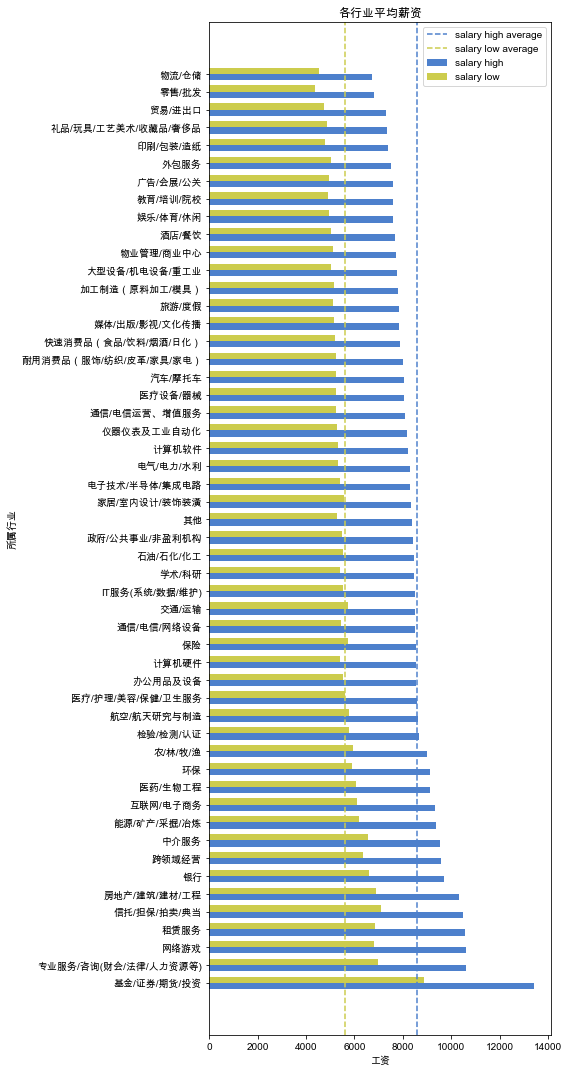

In [48]:
#可视化
fig,ax=plt.subplots(figsize=(8,15))
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
bar_width=0.35
index=np.arange(len(res.index))

rects1=ax.barh(index,res['salary_high'],bar_width,color=(0.3,0.5,0.8),label='salary high')
rects2=ax.barh(index+bar_width,res['salary_low'],bar_width,color=(0.8,0.8,0.3),label='salary low')

ax.set(xlabel='工资',ylabel='所属行业',title='各行业平均薪资')
ax.set_yticks(index+bar_width/2)
ax.set_yticklabels(res.index)
#添加平均线
ax.axvline(res['salary_high'].mean(),ls='--',color=(0.3,0.5,0.8),label='salary high average')
ax.axvline(res['salary_low'].mean(),ls='--',color=(0.8,0.8,0.3),label='salary low average')

ax.legend()

fig.tight_layout()
plt.show()

fig.savefig('{}.png'.format(ax.get_title()), transparent=False, dpi=80, bbox_inches="tight")